In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline
from typing import List

In [7]:
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    return smoothed

def compute_rolling_mean(data_frame_values, window_size):
    return data_frame_values.rolling(window=window_size, center=True).mean()

def compute_linear_regression(x_values, y_values):
    coeficients = np.polyfit(x_values, y_values, 1)
    return np.polyval(coeficients, x_values)

def plot_original_values(axis, x_values, y_values, label):
    axis.plot(x_values, y_values, color='tab:blue', label=label, alpha=1, linewidth=2, linestyle='-')

def plot_regression_line(axis, x_values, y_values):
    axis.plot(x_values, y_values, color='tab:orange', label='Regression Line', linewidth=2, linestyle='--')

def plot_original_trend(axis, start_y, end_y, start_x, end_x):
    axis.plot([start_x, end_x], [start_y, end_y], color='green', alpha=0.5, linestyle='-.', linewidth=2, label='Original trend')
    
def plot_smoothed_values(axis, x_values, y_values):
    # Instantiate a second axes that shares the same x-axis
    axis2 = axis.twinx()
    # Plot the smoothed data on a second y-axis
    color = 'tab:red'
    axis2.set_ylabel('Smoothed Trend', color=color, fontsize=12)
    axis2.plot(x_values, y_values, color=color, label='Trend', alpha=0.5, linewidth=2, linestyle='--')
    axis2.tick_params(axis='y', labelcolor=color)
    axis2.grid(False)
    axis2.set_yticks([])

In [ ]:
# Load the data from the CSV file
df = pd.read_csv("metrics.csv")

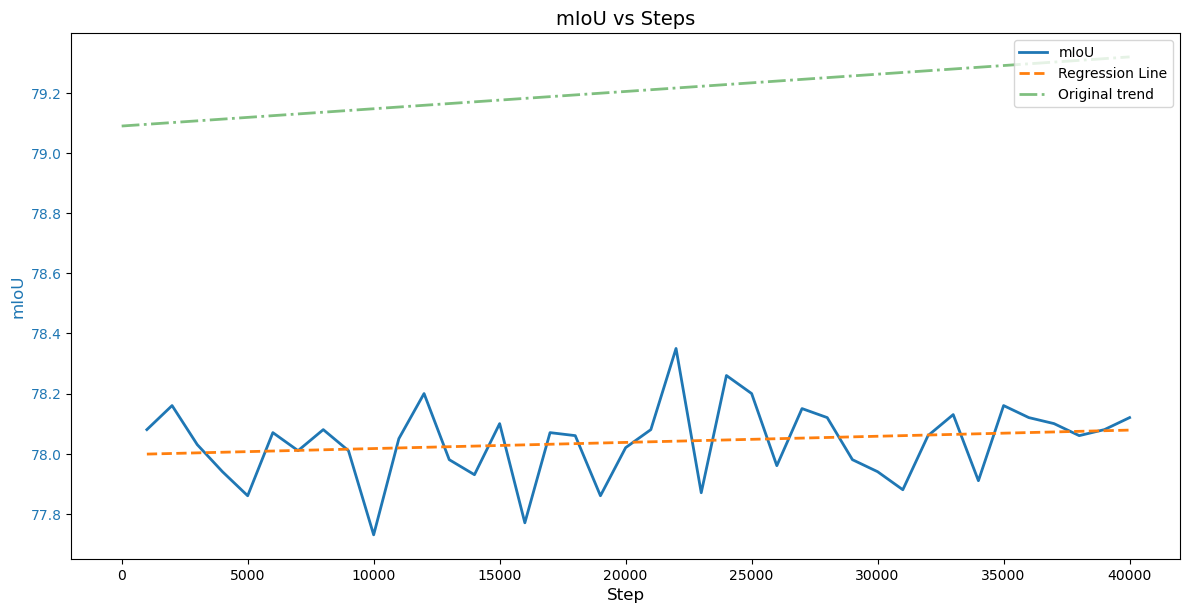

In [8]:
window_size = 1
original_values = df['mIoU']
steps = df['step']

# Compute the rolling mean
rolling_values = compute_rolling_mean(original_values, window_size)
# Compute smoothed values
smoothed_values = smooth(original_values, 0.999)
# Compute the linear regression
y_pred_reg = compute_linear_regression(steps, original_values)
residuals = original_values - y_pred_reg


# Plot the original data
fig, axis = plt.subplots(figsize=(12, 6))
axis.set_xlabel('Step', fontsize=12)
axis.set_ylabel('mIoU', color='tab:blue', fontsize=12)
axis.tick_params(axis='y', labelcolor='tab:blue')

# Plot the original values
plot_original_values(axis, steps, original_values, 'mIoU')

# Plot the regression line
plot_regression_line(axis, steps, y_pred_reg)


# Plot line of the original trend
start_y = 79.09
end_y = 79.32
start_x = 0
end_x = 40000
plot_original_trend(axis, start_y, end_y, start_x, end_x)

# Plot the smoothed values
# plot_smoothed_values(axis, steps, smoothed_values)

# Title and legend
fig.tight_layout()
plt.title('mIoU vs Steps', fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=axis.transAxes)

# Saving and showing the plot
#plt.savefig('Figures/Smoothed_mIoU_v1.png', dpi=300, bbox_inches='tight')
plt.show()


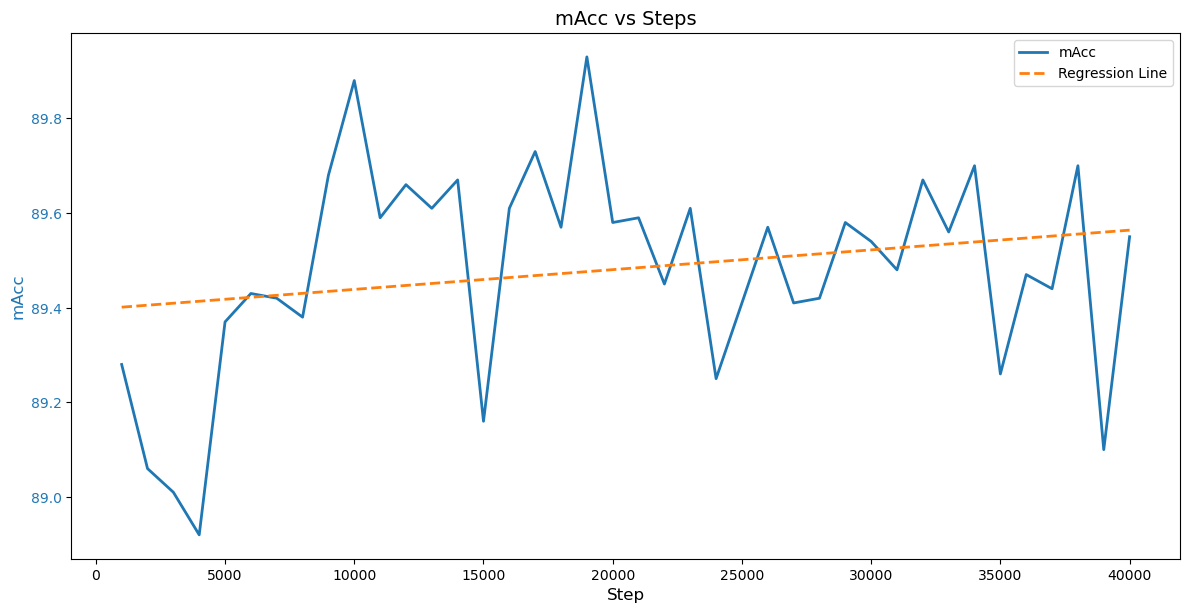

In [10]:

window_size = 1

# Compute the rolling mean
original_values = df['mAcc']

# Compute the rolling mean
rolling_values = compute_rolling_mean(original_values, window_size)
# Compute smoothed values
smoothed_values = smooth(original_values, 0.999)
# Compute the linear regression
y_pred_reg = compute_linear_regression(steps, original_values)
residuals = original_values - y_pred_reg


# Plot the original data
fig, axis = plt.subplots(figsize=(12, 6))
axis.set_xlabel('Step', fontsize=12)
axis.set_ylabel('mAcc', color='tab:blue', fontsize=12)
axis.tick_params(axis='y', labelcolor='tab:blue')

# Plot the original values
plot_original_values(axis, steps, original_values, 'mAcc')

# Plot the regression line
plot_regression_line(axis, steps, y_pred_reg)

# Plot the smoothed values
# plot_smoothed_values(axis, steps, smoothed_values)

# Title and legend
fig.tight_layout()
plt.title('mAcc vs Steps', fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=axis.transAxes)

# Saving and showing the plot
# plt.savefig('Figures/Smoothed_mIoU_v1.png', dpi=300, bbox_inches='tight')
plt.show()

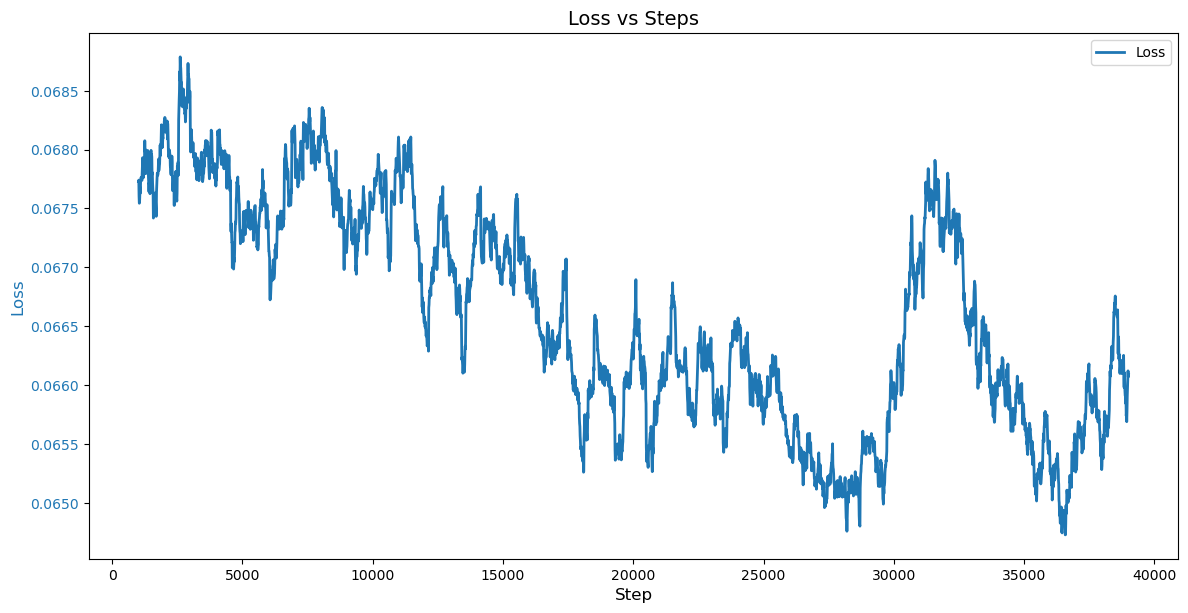

In [16]:
# Load the data from the CSV file
df = pd.read_csv("losses.csv")

window_size = 200


# Compute the rolling mean
original_values = df['loss']

rolling_values = original_values.rolling(window=window_size, center=True).mean()
smoothed_values = smooth(original_values, 0.999)

# Plot the original data
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Step', fontsize=12)
ax1.set_ylabel('Loss', color=color, fontsize=12)
ax1.plot(df['step'], rolling_values, color=color, label='Loss', alpha=1, linewidth=2, linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# # Instantiate a second axes that shares the same x-axis
# ax2 = ax1.twinx()

# # Plot the smoothed data on a second y-axis
# color = 'tab:red'
# ax2.set_ylabel('Smoothed Value', color=color, fontsize=12)
# ax2.plot(df['step'], smoothed_values, color=color, label='Smoothed', alpha=0.5, linewidth=2, linestyle='--')
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.grid(False)
# ax2.set_yticks([])

# Title and legend
fig.tight_layout()
plt.title('Loss vs Steps', fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Saving and showing the plot
#plt.savefig('Figures/Smoothed_mIoU_v1.png', dpi=300, bbox_inches='tight')
plt.show()